# Thanks to AIDevNepal
## Learn, Share and Grow

## To show the absolute path of environment

In [1]:
import sys 
sys.executable

# home/abhiyush/anaconda3/env/abhiyush4/bin/python

'/home/abhiyush/anaconda3/envs/abhiyush4/bin/python'

## Importing some basics libraries 

In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

## Alternative way to install the library through jupyter notebook

In [ ]:
!conda install opencv


## Reading csv file providing absolute or relative path

In [6]:

train_df = pd.read_csv("/media/abhiyush/New Volume/AI developers Nepal/Datasets/Kaggle-MNIST-Digit recognizer/train.csv")
test_df = pd.read_csv("/media/abhiyush/New Volume/AI developers Nepal/Datasets/Kaggle-MNIST-Digit recognizer/test.csv")



## To show top two rows of train datasets

In [7]:
train_df.head(2)



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Storing all the columns of train datasets except column "label"

In [8]:
train_df_X = train_df.drop("label", axis = 1)

## Converting the dataframes to arryas

In [9]:
X_train = train_df_X.values
X_test = test_df.values
y_train = train_df["label"].values

## To identify the shape of the train dataset

In [15]:
X_train.shape

(42000, 784)

## Reshaping columns of each row into 28 * 28 pixels

In [11]:
X_train_images = X_train.reshape(-1,28,28) #-1 le auto adjust garcha

## Displaying just some random numbers from train dataset in 28 * 28 pixel

Random_index: 30178
2


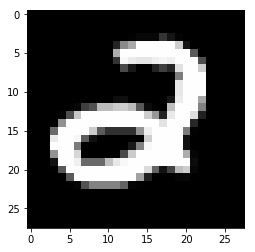

In [13]:
random_index = np.random.randint(0, len(y_train)) #0 to 42k ko bich ma random value lincha
print("Random_index:", random_index)
plt.imshow(X_train_images[random_index], cmap = "gray")
print(y_train[random_index])

## importing the keras module

In [20]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

/home/abhiyush/anaconda3/envs/abhiyush4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Creating a function to create a model

In [21]:
def create_model():
    m = Sequential() #sequential is used to create empty space i.e just like an empty whiteboard of a classroom
    m.add(Dense(20, input_dim = 784, activation = "relu")) #16 bhaneko no of nodes in 1st layer
    m.add(Dense(20, activation = "relu")) #20 means number of nodes in 1st hidden layer with activation function relu
    m.add(Dense(20, activation = "relu")) #20 means number of nodes in 2nd hidden layer with activation functon relu
    m.add(Dense(20, activation = "relu")) #20 means number of nodes in 1st hidden layer with activation functon relu
    m.add(Dense(10, activation = "softmax")) #10 means number of nodes of output layer We keep the number of nodes as 10 since number of digits to predict are 10
    
    return m

## Defining the object 

In [22]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total params: 17,170
Trainable params: 17,170
Non-trainable params: 0
_________________________________________________________________


## to compile a model with "Categorical_crossentropy" as a loss, SGD with learning rate 0.02 as optimizer and acc as a metrics 

In [23]:
model.compile(loss = "categorical_crossentropy", optimizer=SGD(lr = 0.02), metrics = ["acc"])

## to compile a model with "mse" (mean square error) as a loss, SGD with learning rate 0.001 as optimizer and acc as a metrics¶

In [ ]:
model.compile(loss = "mse", optimizer=SGD(lr = 0.001), metrics = ["acc"]) #mse = mean absolute error

## importing np_utils from keras library

In [24]:
from keras.utils import np_utils

## Converting into categorical value just like onehotencoder

In [25]:
y_1h = np_utils.to_categorical(y_train)

In [26]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [27]:
y_1h

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [28]:
y_1h.shape

(42000, 10)

## Fitting the model with epochs as 50 and batch_size as 200

### epochs - number of times to train a model
### batch_size - how many images to send in one patch so that it won't occupy much RAM memory

In [29]:
history = model.fit(X_train, y_1h, epochs=50, batch_size=200) #batch size bhaneko ek choti ma kati ota images line so that ram memory dherai nakhaos

Epoch 1/50
42000/42000 [==============================] - 2s 55us/step - loss: 1.8238 - acc: 0.5717
Epoch 2/50
42000/42000 [==============================] - 2s 41us/step - loss: 0.7594 - acc: 0.8033
Epoch 3/50
42000/42000 [==============================] - 2s 41us/step - loss: 0.5834 - acc: 0.8618
Epoch 4/50
42000/42000 [==============================] - 2s 40us/step - loss: 0.4933 - acc: 0.8809
Epoch 5/50
42000/42000 [==============================] - 2s 42us/step - loss: 0.3884 - acc: 0.8910
Epoch 6/50
42000/42000 [==============================] - 2s 43us/step - loss: 0.3488 - acc: 0.8989
Epoch 7/50
42000/42000 [==============================] - 2s 40us/step - loss: 0.3228 - acc: 0.9059
Epoch 8/50
42000/42000 [==============================] - 2s 40us/step - loss: 0.3087 - acc: 0.9086
Epoch 9/50
42000/42000 [==============================] - 2s 40us/step - loss: 0.2939 - acc: 0.9123
Epoch 10/50
42000/42000 [==============================] - 2s 40us/step - loss: 0.2791 - acc: 0.9154

## Creating a function to visualize a graph for loss

In [33]:
def visualize_loss(h):
    loss = h.history["loss"]
    plt.plot(loss)
    plt.grid()

## Creating a function to visualize a graph for accuracy

In [31]:
def visualize_accuracy(a):
    accuracy = a.history["acc"]
    plt.plot(accuracy)
    plt.grid()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

## Calling a function "visualize_loss"

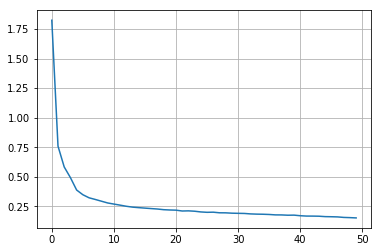

In [34]:
visualize_loss(history)

## Calling a function "visualize_loss"

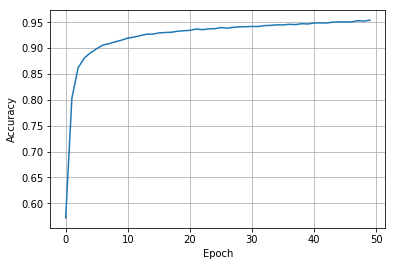

In [35]:
visualize_accuracy(history)

## Predicting a model

In [36]:
predictions = model.predict(X_test)

In [37]:
predictions

array([[1.4413523e-06, 1.9734816e-06, 9.9122530e-01, ..., 1.5383208e-05,
        1.4426621e-07, 3.6975301e-08],
       [9.9997056e-01, 2.8540993e-12, 1.3798333e-07, ..., 6.5336409e-10,
        8.2815106e-09, 3.8182151e-09],
       [5.9872371e-05, 4.5591369e-06, 1.0025760e-03, ..., 5.2066930e-03,
        2.2154555e-03, 9.5063955e-01],
       ...,
       [1.1091183e-19, 5.9987257e-17, 7.9209073e-08, ..., 9.5592846e-16,
        5.5972632e-06, 3.1623225e-07],
       [5.5995906e-11, 2.2691375e-15, 1.6968750e-08, ..., 3.4101825e-07,
        3.1584349e-08, 9.9968624e-01],
       [2.7677524e-07, 6.3735815e-06, 9.9994409e-01, ..., 2.8127286e-06,
        1.3407221e-06, 2.2159369e-10]], dtype=float32)

## Round off the values upto 3 decimal places and finding out the place with highest probability

In [38]:
output = np.round(predictions,3)
pred_test = [np.argmax(out) for out in output]
pred_test

[2,
 0,
 9,
 9,
 3,
 9,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 5,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 7,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 8,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 3,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 8,
 8,
 9,
 2,
 2,
 5,
 9,
 1,
 0,
 9,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 1,
 9,
 3,
 9,
 7,
 4,
 0,
 9,
 2,
 0,
 7,
 3,
 0,
 5,
 0,
 4,
 0,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 3,
 3,
 3,
 7,
 2,
 8,
 6,
 3,
 8,
 7,
 8,
 4,
 3,
 5,
 6,
 0,
 0,
 0,
 3,
 1,
 3,
 0,
 4,
 3,
 4,
 5,
 5,
 8,
 7,
 7,
 2,
 8,
 4,
 3,
 5,
 6,
 5,
 3,
 7,
 5,
 7,
 8,
 3,
 0,
 4,
 5,
 1,
 2,
 7,
 6,
 3,
 0,
 2,
 7,
 8,
 6,
 1,
 3,
 7,
 4,
 1,
 2,
 4,
 3,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 6,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 6,
 2,
 0,
 9,
 3,
 6,
 7,
 2,
 1,
 6,
 3,
 4,
 2,
 3,
 1,
 2,
 2,
 0,
 4,
 6,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 2,
 2,
 3,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 4,
 8,
 3,
 8,


In [39]:
output

array([[0.   , 0.   , 0.991, ..., 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.001, ..., 0.005, 0.002, 0.951],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   , ..., 0.   , 0.   , 0.   ]], dtype=float32)

## To find the shape of the "X_test" i.e rows and columns in X_test

In [40]:
X_test.shape

(28000, 784)

## To find the info of test_df 

In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [41]:
X_train.shape

(42000, 784)

## Reshaping into 28 * 28 pixels

In [49]:
test_X_image = X_test.reshape(-1, 28,28)

## Predicting the digits by providing random pixels from test dataset

[0 1 2 3 4 5 6 7 8 9]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


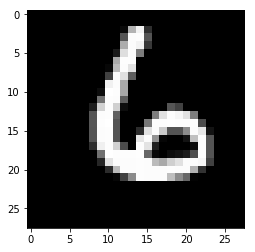

In [43]:
random_index = np.random.randint(0, len(X_test))
print(np.arange(10))
print(np.round(predictions[random_index], decimals = 2))
plt.imshow(test_X_image[random_index], cmap = "gray")

## Defining a function to create a csv file and submit the data to kaggle

In [51]:
def kgl_submit_csv_keras(df, predictions, savename = "Digit_recognizer_prediction",save = "False"):
   # print("Digits:", len(df["label"]))
    print("Prediction", len(predictions))
    
    kgl_df = pd.DataFrame({
        "ImageId" : pd.Series(range(1, len(output)+1)),
        "Label" : pred_test
    })
    
    if save:
        kgl_df.to_csv(savename, index = False)
    return kgl_df


## Calling a function "kgl_submit_csv_keras"

In [52]:
kgl_submit_csv_keras(test_df, predictions, savename = "Digit_regonition_prediction", save = True)

Prediction 28000


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,9
6,7,0
7,8,3
8,9,0
9,10,3
